In [1]:
# ===== Cell 1: Install (mostly already available in Colab) =====
# You can run this once; if all are already installed, it's fine.
!pip install seaborn plotly scikit-learn


In [2]:
# ===== Cell 2: Imports =====
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [3]:
# ===== Cell 3: Helper function to plot confusion matrix =====
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_title(title)
    ax.xaxis.set_ticklabels(["did not land", "landed"])
    ax.yaxis.set_ticklabels(["did not land", "landed"])
    plt.show()


In [4]:
# ===== Cell 4: Load data from URLs =====
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

data = pd.read_csv(url1)   # contains the 'Class' column (label)
X = pd.read_csv(url2)      # contains the features

print("data (with labels):")
display(data.head())

print("X (features only):")
display(X.head())


data (with labels):


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


X (features only):


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
# ===== Cell 5: Define target y =====
y = data['Class']          # label column: 1 = landed, 0 = did not land
print(y.value_counts())


Class
1    60
0    30
Name: count, dtype: int64


In [6]:
# ===== Cell 6: Standardize X and train-test split =====

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((72, 83), (18, 83), (72,), (18,))

In [7]:
# ===== Cell 7: Logistic Regression with GridSearchCV =====
logreg = LogisticRegression(max_iter=1000)

param_grid_lr = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"],  # both support l2
}

logreg_cv = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_lr,
    cv=10,
    scoring="accuracy",
    n_jobs=-1
)

logreg_cv.fit(X_train, y_train)

print("Best parameters (LogReg):", logreg_cv.best_params_)
print("Best CV accuracy (LogReg):", logreg_cv.best_score_)


Best parameters (LogReg): {'C': np.float64(0.1), 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy (LogReg): 0.85


Test accuracy (LogReg): 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



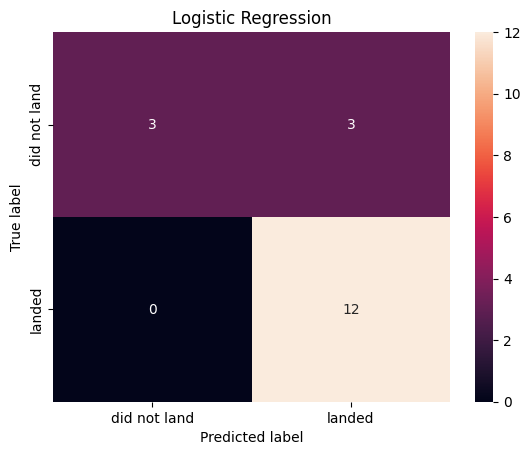

In [8]:
# ===== Cell 8: Evaluate Logistic Regression on test data =====
yhat_lr = logreg_cv.predict(X_test)
acc_lr = logreg_cv.score(X_test, y_test)

print("Test accuracy (LogReg):", acc_lr)
print(classification_report(y_test, yhat_lr))

plot_confusion_matrix(y_test, yhat_lr, title="Logistic Regression")


In [9]:
# ===== Cell 9: SVM with GridSearchCV =====
svm = SVC()

param_grid_svm = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C": np.logspace(-2, 2, 5),
    "gamma": ["scale", "auto"]
}

svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=10,
    scoring="accuracy",
    n_jobs=-1
)

svm_cv.fit(X_train, y_train)

print("Best parameters (SVM):", svm_cv.best_params_)
print("Best CV accuracy (SVM):", svm_cv.best_score_)


Best parameters (SVM): {'C': np.float64(0.01), 'gamma': 'scale', 'kernel': 'linear'}
Best CV accuracy (SVM): 0.8785714285714287


Test accuracy (SVM): 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



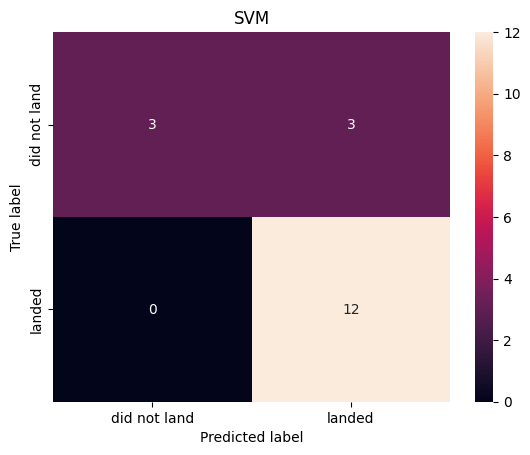

In [10]:
# ===== Cell 10: Evaluate SVM on test data =====
yhat_svm = svm_cv.predict(X_test)
acc_svm = svm_cv.score(X_test, y_test)

print("Test accuracy (SVM):", acc_svm)
print(classification_report(y_test, yhat_svm))

plot_confusion_matrix(y_test, yhat_svm, title="SVM")


In [11]:
# ===== Cell 11: Decision Tree with GridSearchCV =====
tree = DecisionTreeClassifier(random_state=2)

param_grid_tree = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2, 11)),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=param_grid_tree,
    cv=10,
    scoring="accuracy",
    n_jobs=-1
)

tree_cv.fit(X_train, y_train)

print("Best parameters (Tree):", tree_cv.best_params_)
print("Best CV accuracy (Tree):", tree_cv.best_score_)


Best parameters (Tree): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV accuracy (Tree): 0.85


Test accuracy (Tree): 0.8333333333333334
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.91      0.83      0.87        12

    accuracy                           0.83        18
   macro avg       0.81      0.83      0.82        18
weighted avg       0.84      0.83      0.84        18



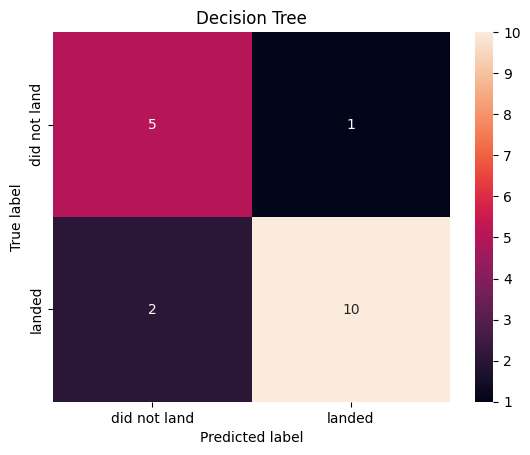

In [12]:
# ===== Cell 12: Evaluate Decision Tree on test data =====
yhat_tree = tree_cv.predict(X_test)
acc_tree = tree_cv.score(X_test, y_test)

print("Test accuracy (Tree):", acc_tree)
print(classification_report(y_test, yhat_tree))

plot_confusion_matrix(y_test, yhat_tree, title="Decision Tree")



In [13]:
# ===== Cell 13: KNN with GridSearchCV =====
knn = KNeighborsClassifier()

param_grid_knn = {
    "n_neighbors": list(range(1, 11)),
    "weights": ["uniform", "distance"],
    "p": [1, 2],       # 1 = Manhattan, 2 = Euclidean
}

knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=10,
    scoring="accuracy",
    n_jobs=-1
)

knn_cv.fit(X_train, y_train)

print("Best parameters (KNN):", knn_cv.best_params_)
print("Best CV accuracy (KNN):", knn_cv.best_score_)


Best parameters (KNN): {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Best CV accuracy (KNN): 0.8642857142857142


Test accuracy (KNN): 0.7777777777777778
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.83      0.83      0.83        12

    accuracy                           0.78        18
   macro avg       0.75      0.75      0.75        18
weighted avg       0.78      0.78      0.78        18



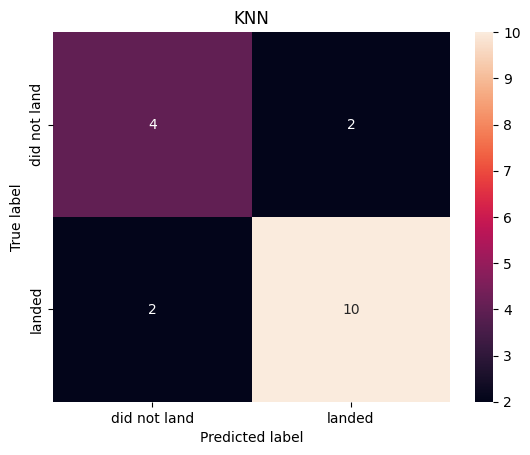

In [14]:
# ===== Cell 14: Evaluate KNN on test data =====
yhat_knn = knn_cv.predict(X_test)
acc_knn = knn_cv.score(X_test, y_test)

print("Test accuracy (KNN):", acc_knn)
print(classification_report(y_test, yhat_knn))

plot_confusion_matrix(y_test, yhat_knn, title="KNN")


In [15]:
# ===== Cell 15: Compare models =====
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "KNN"],
    "Test Accuracy": [acc_lr, acc_svm, acc_tree, acc_knn]
})

results


,Model,Test Accuracy
0,Logistic Regression,0.833333
1,SVM,0.833333
2,Decision Tree,0.833333
3,KNN,0.777778


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Test Accuracy'].plot(kind='hist', bins=20, title='Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Test Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Test Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Test Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Test Accuracy'].plot(kind='line', figsize=(8, 4), title='Test Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Test Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)